## 1. Thêm thư viện

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Đặt câu hỏi

#### Đọc dữ liệu đã tiền xử lí

In [2]:
cleaned_df = pd.read_csv("../data/cleaned_data.csv")
cleaned_df.head()

,Date_published,Name,Review_header,Review_body,Verified_review,Type_of_traveller,Seat_type,Route,Date_flown,Seat_comfort,Cabin_staff_service,Food_and_beverages,Inflight_entertainments,Ground_service,Value_for_money,Overall_rating,Recommended
0,2023-12-21,T Maddern,“I couldn’t fault them”,This was our first flight with British Airways...,Trip Verified,Family Leisure,Business Class,"['LONDON HEATHROW', 'STOCKHOLM']",2023-12-01,4,5,5,3,5,5,10,yes
1,2023-12-21,K Pearson,“incompetence in customer service”,I recently encountered a highly disappointing ...,Trip Verified,Solo Leisure,Economy Class,"['INDIANAPOLIS', 'MUMBAI', 'LONDON HEATHROW']",2023-12-01,1,1,3,3,1,1,1,no
2,2023-12-20,C Shaw,“The most ridiculous thing I've heard”,Beware! BA don't provide any refund due to a v...,Not Verified,Family Leisure,Premium Economy,"['CYPRUS', 'NEW YORK']",2023-12-01,3,3,3,3,1,1,1,no
3,2023-12-20,C Horner,"""one of the most disgusting onboard meals""",Check in was chaotic and badly organised. Even...,Trip Verified,Solo Leisure,Business Class,"['GRAN CANARIA', 'LONDON GATWICK']",2023-12-01,3,4,1,3,3,5,6,yes
4,2023-12-18,C Lowe,“Does BA pay experts to design these breakfasts”,All 4 of our flights were fine in terms of com...,Not Verified,Couple Leisure,Business Class,"['BELFAST CITY', 'ATLANTA', 'LONDON HEATHROW']",2023-11-01,4,5,1,3,5,5,6,yes


### Câu hỏi 1: Có sự khác biệt về tỉ lệ đề xuất sử dụng hãng bay giữa các loại hành khách không ?

-   Mục đích: Xác định xem loại hành khách nào (du lịch, công tác, v.v.) có mức độ hài lòng cao nhất hoặc thấp nhất qua tỷ lệ đề xuất.
-   Sử dụng cột Type_of_traveller và Recommended để tính số lượng hành khách đề xuất có hoặc không của mỗi loại, sau đó tính tỷ lệ đề xuất cho mỗi loại.

#### Tiền xử lý

In [3]:
# Thực hiện group_by và đếm số lượng hành khách đề xuất cho mỗi nhóm
grouped_data = cleaned_df.groupby(['Type_of_traveller', 'Recommended']).size().reset_index(name='Count')

# Tính tổng recommended của mỗi nhóm
total_responses = grouped_data.groupby('Type_of_traveller')['Count'].sum().reset_index()

# Merge cột tổng vào dữ liệu
grouped_data = grouped_data.merge(total_responses, on='Type_of_traveller', suffixes=('', '_total'))

# Tính phần trăm cho số đề xuất của mỗi loại
grouped_data['Percentage'] = ((grouped_data['Count'] / grouped_data['Count_total']) * 100).round(1)
grouped_data

,Type_of_traveller,Recommended,Count,Count_total,Percentage
0,Business,no,498,642,77.6
1,Business,yes,144,642,22.4
2,Couple Leisure,no,659,1056,62.4
3,Couple Leisure,yes,397,1056,37.6
4,Family Leisure,no,254,402,63.2
5,Family Leisure,yes,148,402,36.8
6,Solo Leisure,no,496,900,55.1
7,Solo Leisure,yes,404,900,44.9


#### Trực quan hóa

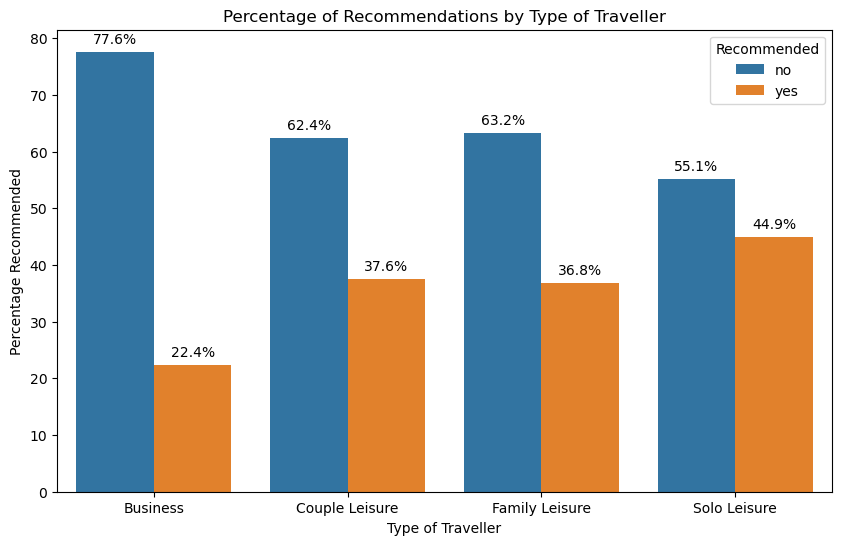

In [4]:
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Type_of_traveller', y='Percentage', hue='Recommended', data=grouped_data)

# Hiện tỷ lệ cho mỗi cột
for p in bar_plot.patches:
    if p.get_height() > 0:
        bar_plot.annotate(format(p.get_height(), '.1f') + '%', 
                          (p.get_x() + p.get_width() / 2., p.get_height()), 
                          ha = 'center', va = 'center', 
                          xytext = (0, 9), 
                          textcoords = 'offset points')

plt.title('Percentage of Recommendations by Type of Traveller')
plt.xlabel('Type of Traveller')
plt.ylabel('Percentage Recommended')
plt.legend(title='Recommended', loc='upper right')

plt.show()

#### Nhận xét:
-   Hành khách đi công tác có tỷ lệ đề xuất không cao nhất (77.6%), cho thấy mức độ không hài lòng đáng kể.
-   Các cặp đôi đi giải trí và gia đình có tỷ lệ đề xuất không tương đối cao, lần lượt là 62.4% và 63.2%, cần cải thiện để tăng tỷ lệ hài lòng.
-   Hành khách đi giải trí một mình có tỷ lệ đề xuất có và không gần ngang nhau, phản ánh mức độ hài lòng trung lập. 
 
=> Những số liệu này chỉ ra rằng hãng hàng không cần xem xét cải thiện dịch vụ, đặc biệt là cho hành khách đi công tác, để cải thiện tỷ lệ khuyến nghị.